<a href="https://colab.research.google.com/github/eihei1067/protein_analysis/blob/main/CapiPy_minimal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



>**WELCOME TO minimal CAPIPY COLAB!**
---

In this colab file, you will find a simplified version of CapiPy with only the most important modules.
At the end, there is also the possibilty for you to download your project file to your local computer.
All functionalities and files remain the same formatting (see https://github.com/drou0302/CapiPy for more information).

The SURFACE ANALYSIS module!

To run each of the cells, just press the play button, wait and enjoy!

In the different modules, you will be asked to provide full paths to different files or folders.

To do so, on the left hand side you have the access to your folder indicated by the 📁 symbol. By default, all the results are saved in the /content/ folder.

To copy a path, select the file or folder and right click, then select 'Copy path' and paste directly that information.

A new folder for each of your projects will be created when you run the first cells.

**Remember, that CapiPy is thought to be used sequentially, so follow the whole process for optimal results.**

In [1]:
#@title INSTALLATION - RUN ONLY AT THE START
#@markdown Download CONDA for Google collab - save environment for CapiPy.
print('Downloading conda...')
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [2]:
#@markdown Download all necessary dependencies for CapiPy and install them.
print('Installing biopython...')
!pip install biopython --root-user-action=ignore
!pip install xmltramp2 --root-user-action=ignore
!pip install pandas --root-user-action=ignore
!pip install py3Dmol --root-user-action=ignore

print('Finished! Ready to go!')

Installing biopython...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 111.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for xmltramp2: filename=xmltramp2-3.1.1-py3-none-any.whl size=7315 sha256=91c0a5d8d3eceaa4ad63d534b7ddf3b6ac9979ef1fe16755f6d77eb23022548e
  Stored in directory: /root/.cache/pip/wheels/84/9a/cf/d7a2d7386a327d755ee9ef8840c8d8aa8c360a41b10ab2e670
Successfully built xmltramp2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 103.7 MB/s eta 0:00:00


Finished! Ready to go!


In [3]:
#@title Import dependencies and download necessary files - RUN FOR EVERY PROJECT
#@markdown Import all necessary dependencies to run the CapiPy modules and download the necessary files for all modules.
import urllib.request
import urllib.parse
import glob
import os
import shutil
import numpy
import time
import urllib
import pandas as pd
import traceback
import requests
import csv
import re
import py3Dmol
import numpy as np
import urllib
import pandas as pd
import numpy as np
import requests

from io import StringIO
from Bio.Blast import NCBIWWW
from Bio.Blast.Applications import NcbiblastpCommandline
from Bio import SeqIO, AlignIO, SearchIO, Align
from Bio.PDB import is_aa, PDBList, PDBIO, Superimposer
from Bio.PDB.Selection import unfold_entities
from Bio.PDB.PDBParser import PDBParser
from Bio.PDB.Polypeptide import *
from Bio.PDB.Polypeptide import PPBuilder
from sys import platform
from Bio import BiopythonWarning
from Bio.Blast import NCBIXML
from Bio.Align import substitution_matrices
from Bio.Align.Applications import ClustalwCommandline
from Bio import Entrez, Seq, SeqIO, SearchIO
clustalw_exe = 'clustalw2'


/usr/local/lib/python3.11/site-packages/Bio/Application/__init__.py:39: BiopythonDeprecationWarning: The Bio.Application modules and modules relying on it have been deprecated.

Due to the on going maintenance burden of keeping command line application
wrappers up to date, we have decided to deprecate and eventually remove these
modules.

We instead now recommend building your command line and invoking it directly
with the subprocess module.
  warnings.warn(


In [9]:
#@markdown Create Project Folder.
PROJECT_DIR= "/content/test" #@param {type:"string"}
#@markdown After creating your folder, upload your pdb file. IT HAS TO BE CLEAN (NO NON-STANDARD RESIDUES!).
import os
os.chdir('/content/')
initial_loc = os.getcwd()

if PROJECT_DIR != "":
    if not os.path.isdir(PROJECT_DIR):
        os.mkdir(PROJECT_DIR)
    os.chdir(PROJECT_DIR)
else:
    print('Enter your folder name first!')



In [11]:
#@markdown View PDB file. Make sure you have added the pdb file to your project folder.
import glob
import os

initial_loc = os.getcwd()
print(initial_loc)
print(PROJECT_DIR)
if PROJECT_DIR not in initial_loc:
  os.chdir(PROJECT_DIR)

try:
  PDB_FILE = glob.glob('*.pdb')[0]
  pdb_exists = True
except BaseException:
  pdb_exists = False


if pdb_exists is True:
  found_file = os.path.isfile(PDB_FILE)
  os.getcwd()
  parser = PDBParser()
  model_file_name = 'query'
  model_structure = parser.get_structure(model_file_name, PDB_FILE)
  model_chain = model_structure.get_chains()
  chainid = []
  for chains in model_structure.get_chains():
      if chains.get_id() not in chainid:
          chainid.append(chains.get_id())

  import py3Dmol
  import os
  view = py3Dmol.view()
  if os.path.isfile(PDB_FILE) is True:
    view.addModel(open(PDB_FILE, 'r').read(),'pdb')
    view.setStyle({'model':-1},{'cartoon': {'color':'blue'}})
  view.zoomTo()
  view.show()

else:
  print('ERROR - Have you uploaded your PDB file?')

os.chdir(initial_loc)


/content/test
/content/test


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

PDB file found.

Measuring the minimum bounding box...

Your protein, formed by 1 chains, has an aproximate dimensions of: 52.074997 A, 47.892 A, 48.087997 A.
Giving an aproximate volume of: 119930.29 A³

Calculating the exposure of each residue in the structure...
Sorting the residues depending on their exposure...
Total number of surface residues: 280 out of 392
Measuring distances and identifying clusters...
Clusters can be found in Clusters.txt
Calculating contacts between chain A and it's neighbours...
Distance to the multimeric interface successful. Your results can be found in Cluster_interface.txt


<ipython-input-12-2a643fd430b2>:512: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  surface = pd.read_csv('Graph_data.txt', delimiter='		',)


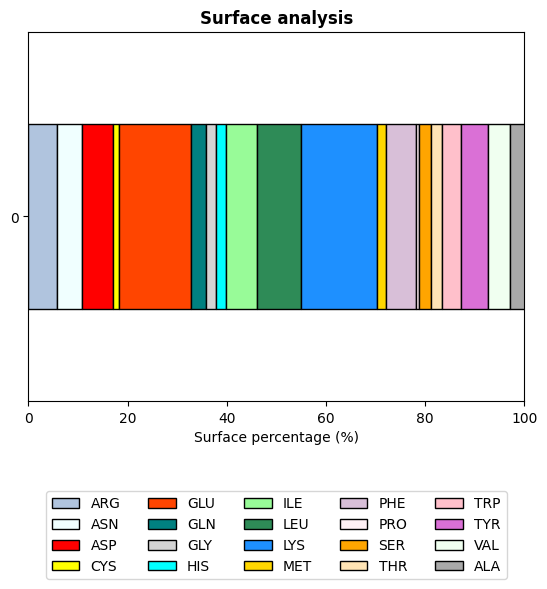

In [12]:
#@title SURFACE ANALYSIS

#@markdown Analysis of the surface of your protein.
import random
import os
import csv
from Bio.PDB.Polypeptide import PPBuilder
from Bio.PDB import is_aa, PDBList, PDBIO, Superimposer

from Bio import BiopythonWarning
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', BiopythonWarning)

import numpy as np
from Bio.PDB import HSExposureCB, PDBParser

initial_loc = '/content/'
os.chdir(initial_loc)

os.chdir(PROJECT_DIR)


file_exist = os.path.isfile(PDB_FILE)

if file_exist is True:
    print('PDB file found.')
else:
  print('Cannot find the pdb file. Check again the name!')
  quit()

# Open the desired pdb file
parser = PDBParser(QUIET=True)
fullid = "Q00F"
fullfile = PDB_FILE
full_structure = parser.get_structure(fullid, fullfile)
mdel = full_structure[0]
ppb = PPBuilder()

ca_coord = []
number_of_chains = 0
for chain in mdel.get_list():
    number_of_chains += 1
for residue in chain.get_list():
    if residue.has_id("CA"):
        ca = residue["CA"]
        ca_coord.append(ca.get_coord())

print("\nMeasuring the minimum bounding box...\n")

ca_coord = np.array(ca_coord)
min_x = min(ca_coord[:, 0])
min_y = min(ca_coord[:, 1])
min_z = min(ca_coord[:, 2])
max_x = max(ca_coord[:, 0])
max_y = max(ca_coord[:, 1])
max_z = max(ca_coord[:, 2])
box_dimensions = ([max_x - min_x, max_y - min_y, max_z - min_z])
volume = box_dimensions[0] * box_dimensions[1] * box_dimensions[2]
print("Your protein, formed by " + str(number_of_chains) + " chains, has an aproximate dimensions of: "
  + str(box_dimensions[0]) + " A, " + str(box_dimensions[1]) + " A, " + str(box_dimensions[2]) +
  " A.\nGiving an aproximate volume of: " + str(volume) + " A\u00b3\n")


print("Calculating the exposure of each residue in the structure...")
RADIUS = 16.0
hse_cb = HSExposureCB(mdel, radius=RADIUS)
buried = []
semiburied = []
exposed = []
print("Sorting the residues depending on their exposure...")
for r in mdel.get_residues():
    try:
        if is_aa(r) and r.xtra["EXP_HSE_B_U"] >= 35 and r.xtra["EXP_HSE_B_D"] >= 35:
          buried.append(r)
        elif is_aa(r) and 35 > r.xtra["EXP_HSE_B_U"] >= 25 and 35 > r.xtra["EXP_HSE_B_D"] >= 25:
            semiburied.append(r)
        elif is_aa(r):
            exposed.append(r)
    except KeyError:
        continue

# Calculate the surface in A according to the predicted surface of each amino acid classified as exposed
# - 10.1371/journal.pone.0080635
aa = ["ALA", "ARG", "ASN", "ASP", "CYS", "GLU", "GLN", "GLY", "HIS", "ILE", "LEU", "LYS", "MET", "PHE", "PRO",
  "SER", "THR", "TRP", "TYR", "VAL"]

aa_ASA = {"ALA": 121, "ARG": 265, "ASN": 187, "ASP": 187, "CYS": 148, "GLU": 214, "GLN": 214, "GLY": 97,
      "HIS": 216, "ILE": 195, "LEU": 191, "LYS": 230, "MET": 203, "PHE": 228, "PRO": 154, "SER": 143,
      "THR": 163, "TRP": 265, "TYR": 255, "VAL": 165}

totals2 = 0
for r in exposed:
    totals2 += aa_ASA[r.get_resname()]

aa_s2 = {}
aa_s2 = aa_s2.fromkeys(aa)
aa_n = {}
aa_n = aa_n.fromkeys(aa)
for exposed_aa in exposed:
    try:
        aa_s2[exposed_aa.get_resname()] += aa_ASA[exposed_aa.get_resname()]
        aa_n[exposed_aa.get_resname()] += 1

    except TypeError:
       aa_s2[exposed_aa.get_resname()] = aa_ASA[exposed_aa.get_resname()]
       aa_n[exposed_aa.get_resname()] = 1


aa_s2_perc = {}
aa_s2_perc = aa_s2_perc.fromkeys(aa)

for aaname in aa:
    try:
        aa_s2_perc[aaname] = str("{:.2f}".format(((aa_s2[aaname] / totals2) * 100)) + "%")
    except TypeError:
        aa_s2_perc[aaname] = '0%'

print("Total number of surface residues: " + str(len(exposed)) + " out of " + str(len(exposed) + len(semiburied) + len(buried)))

if os.path.exists("General_info.txt"):
    check = open("General_info.txt").read()
else:
    check = ""
if "As for" not in check:
    with open("General_info.txt", "a") as f1:
        print("Your protein aproximate dimensions in Angstroms are: " + str(box_dimensions[0]) + "A, " +
              str(box_dimensions[1]) + "A, " + str(
            box_dimensions[2]) + "A.\nWhich makes an aproximate volume of: " +
              str(volume) + " A\u00b3\\n", file=f1)
        print("\nAs for its surface, it measures " + str(totals2) + " A\u00b2\\n", file=f1)
        print("From which each amino acid contributes to:", file=f1)
        print("Aminoacid\t Surface(%)\t Total number", file=f1)
        for aa in aa_s2_perc:
            print(aa + "\t\t" + aa_s2_perc[aa] + "\t\t" + str(aa_n[aa]), file=f1)
        print("Total number of surface residues: " + str(len(exposed)), file=f1)


aatocheck = ["LYS", "GLU", "ASP", "HIS", "CYS", "TYR", "ARG"]  # commonly used for immobilisation#
hydrophobic = ["ILE", "LEU", "PHE", "VAL", "TRP", "TYR"]  # arunachalam 2008#
charged = []
hydroph = []

for r in exposed:
    name = r.get_resname()
    if name in aatocheck:
        chainid = r.get_parent().get_id()
        resseq = r.get_id()[1]
        charged.append(name + "_" + str(resseq) + "_" + chainid)
    elif name in hydrophobic:
        chainid = r.get_parent().get_id()
        resseq = r.get_id()[1]
        hydroph.append(name + "_" + str(resseq) + "_" + chainid)

poslist = []
neglist = []
hislist = []
lyslist = []
cyslist = []

for item in charged:
    if "LYS" in item:
        poslist.append(item)
        lyslist.append(item)
    elif "ASP" in item or "GLU" in item:
        neglist.append(item)
    elif "HIS" in item:
        poslist.append(item)
        hislist.append(item)
    elif "CYS" in item:
        cyslist.append(item)
    elif "ARG" in item:
        poslist.append(item)

def clustering(list1, dic):
    # This method checks if the residues in a certain list have their CA at less than 10A.
    # If so, this residues will be included in the dictionary as a new cluster
    full_structure = parser.get_structure(fullid, fullfile)
    i = 0
    while i in range(len(list1)):
        x1 = list1[i]
        for x2 in list1:
            if x1 != x2:
                dis = mdel[x1.split("_")[2]][int(x1.split("_")[1])]["CA"] - \
                      mdel[x2.split("_")[2]][int(x2.split("_")[1])]["CA"]
                if dis < 10:
                    try:
                        dic[x1].append(x2)
                    except KeyError:
                        dic[x1] = [x2]
        i += 1

def clean(dict1):
    # Clean up the dictionaries created with clustering. This avoids repetition of the same cluster as well as
    # deletes any cluster formed by less than 3 different aminoacids
    dictcopy = dict1.copy()
    keys = list(dictcopy.keys())
    for key in keys:
        if key in dict1[key]:
            dict1.pop(key)
        elif len(dict1[key]) < 2:
            dict1.pop(key)
        elif key in str(dict1.values()):
            dict1.pop(key)
        elif "" in dict1[key]:
            while "" in dict1[key]:
                dict1[key].remove("")

def writeclusterstocsv(cluster, file):
    # Self explanatory. Writes the clusters identified into a csv file.
    with open(file, "a", newline='') as f:
        writer = csv.writer(f)
        if len(cluster) > 1:
            for i in cluster:
                towrite = [i]
                for x in cluster[i]:
                    towrite.append(x)
                writer.writerow(towrite)
            writer.writerow("\n")

def show_clusters(dict):
    # Writes the information of teh clusters into a txt file. More "user friendly" explanation of the results
    f = open("Clusters.txt", "a")
    if len(dict) > 1:
        f.write(list(dict.keys())[0] + " residues in a cluster (<10A):\n")
        i = 1
        for keys in list(dict.keys())[1:]:
            toprint = "Cluster " + str(list(dict.keys())[0][0:3].lower()) + str(i) + ":" + str(keys)
            length = len(dict[keys])
            x = 0
            while x < length:
                toprint += ", " + str(dict[keys][x])
                x += 1
            toprint += "."
            print(toprint, file=f)
            i += 1
    f.write("\n")

def uploadcluster():
    # In case the clusters.csv (which is created in the first execution -  is available, file is opened and clusters
    # written back into a Python dictionary to continue execution
    csv_clusters = csv.reader(open("clusters.csv", "r"))
    i = 0
    keys = [[], [], [], [], [], []]
    values = [[], [], [], [], [], []]
    with open("clusters.csv", "r") as file:
        csv_clusters = csv.reader(file)
        for row in csv_clusters:
            if row[0] == "\n":
                i += 1
            else:
                keys[i].append(row[0])
                values[i].append(row[1:])
    x = 0
    for x in range(len(keys)):
        try:
            if keys[x][0] == "Positive":
                for y in range(len(keys[x])):
                    cluster_pos[keys[0][y]] = values[x][y]
            elif keys[x][0] == "Negative":
                for y in range(len(keys[x])):
                    cluster_neg[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Histidine":
                for y in range(len(keys[x])):
                    cluster_his[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Lysine":
                for y in range(len(keys[x])):
                    cluster_lys[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Cysteine":
                for y in range(len(keys[x])):
                    cluster_cys[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Hydrophobic":
                for y in range(len(keys[x])):
                    cluster_hidroph[keys[x][y]] = values[x][y]
        except IndexError:
            x += 1
        x += 1
def clusters_pymol(dict):
    # Writes the clusters into a pymol command which can be direclty copied into the command line
    if len(dict) > 1:
        f = open("PyMol_clusters.pml", "a")
        colours = coloursdic[list(dict.keys())[0]]
        i = 0
        for keys in dict.keys():
            if keys.isalpha() is not True:
                toprint = ("select " + str(list(dict.keys())[0][0:3].lower()) + str(i) + ", (resi " + str(
                    keys.split("_")[1])) + " & chain " + str(dict[keys][1].split("_")[2])
                length = len(dict[keys])
                x = 0
                while x < length:
                    toprint += ", resi " + str(dict[keys][x].split("_")[1]) + " & chain " + str(
                        dict[keys][x].split("_")[2])
                    x += 1
                toprint += ")"
                print(toprint, file=f)
            i += 1
        print("color " + colours + ", " + str(list(dict.keys())[0][0:3].lower()) + "*\n", file=f)


cluster_pos = {"Positive": ["Lys", "Arg", "His"]}
cluster_neg = {"Negative": ["Asp", "Gly"]}
cluster_his = {"Histidine": ["only", "histidines"]}
cluster_lys = {"Lysine": ["only", "lysines"]}
cluster_cys = {"Cysteine": ["only", "cysteines"]}
cluster_hidroph = {"Hydrophobic": ["ILE", "LEU", "PHE", "VAL", "TRP", "TYR"]}
coloursdic = {"Positive": "Blue", "Negative": "Red", "Histidine": "Cyan", "Lysine": "LightBlue",
              "Cysteine": "Yellow", "Hydrophobic": "White"}

if os.path.exists("clusters.csv") is True:
    print("Uploading previously calculated clusters form clusters.csv.\n")
    uploadcluster()
elif os.path.exists("clusters.csv") is False:
    print("Measuring distances and identifying clusters...")
    clustering(poslist, cluster_pos)
    clustering(neglist, cluster_neg)
    clustering(hislist, cluster_his)
    clustering(lyslist, cluster_lys)
    clustering(cyslist, cluster_cys)
    clustering(hydroph, cluster_hidroph)
    clean(cluster_pos)
    clean(cluster_neg)
    clean(cluster_his)
    clean(cluster_lys)
    clean(cluster_cys)
    clean(cluster_hidroph)
    writeclusterstocsv(cluster_pos, "clusters.csv")
    writeclusterstocsv(cluster_neg, "clusters.csv")
    writeclusterstocsv(cluster_his, "clusters.csv")
    writeclusterstocsv(cluster_lys, "clusters.csv")
    writeclusterstocsv(cluster_cys, "clusters.csv")
    writeclusterstocsv(cluster_hidroph, "clusters.csv")
    show_clusters(cluster_pos)
    show_clusters(cluster_neg)
    show_clusters(cluster_his)
    show_clusters(cluster_lys)
    show_clusters(cluster_cys)
    show_clusters(cluster_hidroph)
    print("Clusters can be found in Clusters.txt")

with open("PyMol_clusters.pml", "w") as f:
    chainid = []
    for chains in full_structure.get_chains():
        if chains.get_id() not in chainid:
            chainid.append(chains.get_id())
    if len(chains) > 1:
        for chain in chainid:
            print("set_color shade" + str(chain) + "= [1.0, " + str(random.random()) + ", " + str(
                random.random()) + "]", file=f)
            print("colour shade" + str(chain) + ", chain " + str(chain), file=f)
clusters_pymol(cluster_pos)
clusters_pymol(cluster_neg)
clusters_pymol(cluster_his)
clusters_pymol(cluster_lys)
clusters_pymol(cluster_cys)
clusters_pymol(cluster_hidroph)

def distointer(cluster, list1):
    # Check if the residues in the cluser can interfere with the protein interface
    itemslist = []
    for kcluster in list(cluster.keys())[1:]:
        itemslist.append(kcluster)
        for values in cluster[kcluster]:
            itemslist.append(values)
    for pos1 in itemslist:
        try:
          for pos2 in interface_res["A"]:
              dis = mdel[str(pos1.split("_")[2])][int(pos1.split("_")[1])]["CA"] - mdel["A"][pos2]["CA"]
              if dis != 0 and dis <= 10 and (pos1 not in list1):
                list1.append(pos1)
        except KeyError:
              continue

def writecluster(original, d1, list1, file):
    # Similar to show_cluster method, it writes the information into a .txt file. In this case, it will add a
    # -Warning- if the cluster is close to the specified residues.'''
    it = 1
    f = open(file, "a")
    with open(file) as readfile:
        if "Chain" not in readfile.read():
            f.write("Searching for clusters in close contact to: ")
            if isinstance(original, dict) is True:
                for aas in original:
                    f.write("\nChain " + str(aas) + ":")
                    for aas2 in original[aas]:
                        f.write(" - " + str(aas2))
            elif isinstance(original, list):
                for aas in original:
                    f.write(" - " + str(aas))
            readfile.close()
        else:
            readfile.close()
    f.write("\n" + list(d1.keys())[0] + " residues in a cluster (<10A):\n")
    inlist1 = []
    for k in list(d1.keys())[1:]:
        toprint = "Cluster " + str(list(d1.keys())[0][0:3].lower()) + str(it) + ":" + str(k)
        length = len(d1[k])
        inlist1.append(k)
        x = 0
        while x < length:
            toprint += ", " + str(d1[k][x])
            inlist1.append(d1[k][x])
            x += 1
        toprint += "."
        for ex in inlist1:
            if ex in list1 and "\t -In close proximity to specified residue/s - " not in toprint:
                toprint += "\t -In close proximity to specified residue/s - "
        print(toprint, file=f)
        it += 1
    f.write("\n")
    f.close()

# Start first, identifying how many chains does the model have. Maximum of 10 for convenience
# (and because most proteins fall into this category).
chainres = {"A": [], "B": [], "C": [], "D": [], "E": [], "F": [], "G": [], "H": [], "I": [], "J": []}
chainids = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J"]

# number of chains in model
number_of_chains = 0
for chain in mdel.get_chains():
    number_of_chains += 1

# Create dictionary with all CA location of a chain
for x in range(number_of_chains):
    for residues in mdel[chainids[x]]:
        if is_aa(residues) is True:
            chainres[chainids[x]].append(residues["CA"])

# Delete unnecessary keys in the chainres dictionary
for a in range(len(chainres.keys())):
    if len(chainres[chainids[a]]) == 0:
        del chainres[chainids[a]]

# calculation of the interface residues. This will assume all chains will have the same interactions as chain A.
# This simplification is necessary to get results in a reasonable time.
interface_res = {"A": []}

if number_of_chains > 1:
    print("Calculating if any of the clusters might affect the quaternary structure of your protein. \n "
          "Note: This assumes chain A is in contact with all other subunits and all contacts are identical "
          "between subunits.\n")

calculationdone = os.path.exists("residues_interface.txt")

print("Calculating contacts between chain A and it's neighbours...")
ch_1 = 1
# Calculate the distance of all atoms in chain A to all atoms in other chains. If this distance is <10A,
# the position will be added as part of the interface.
while ch_1 < number_of_chains:
    for ca1 in chainres["A"]:
        for ca2 in chainres[chainids[ch_1]]:
            if ca1.get_parent().get_id()[1] not in interface_res["A"]:
                dist = ca1 - ca2
                if 0 < dist < 10:
                    interface_res["A"].append(ca1.get_parent().get_id()[1])
    ch_1 += 1

    # Assuming all contacts in the different chains are the same as in chain A,
    # copy the residue position to each chain.
    count_start = 1
    for count_start in range(number_of_chains):
        interface_res[chainids[count_start]] = interface_res["A"]
        count_start += 1

    # Write information to file so it doesn't have to be calculated again.
    with open("residues_interface.txt", "a") as fileint:
        print(interface_res, file=fileint)
    print("The position of the residues identified as part of the interface can be found in residues_interface.txt")

# Calculate now if any of the identified clusters is at less than 10A to the any of the interface residues.
intpos = []
intneg = []
inthis = []
intlys = []
intcys = []
inthidroph = []

distointer(cluster_pos, intpos)
writecluster(interface_res, cluster_pos, intpos, "Interface_contacts.txt")
distointer(cluster_neg, intneg)
writecluster(interface_res, cluster_neg, intneg, "Interface_contacts.txt")
distointer(cluster_his, inthis)
writecluster(interface_res, cluster_his, inthis, "Interface_contacts.txt")
distointer(cluster_lys, intlys)
writecluster(interface_res, cluster_lys, intlys, "Interface_contacts.txt")
distointer(cluster_cys, intcys)
writecluster(interface_res, cluster_cys, intcys, "Interface_contacts.txt")
distointer(cluster_hidroph, inthidroph)
writecluster(interface_res, cluster_hidroph, inthidroph, "Interface_contacts.txt")
print("Distance to the multimeric interface successful. Your results can be found in Cluster_interface.txt")

import matplotlib.pyplot as plt
import pandas as pd
import io

with open('General_info.txt', 'r') as f1:
    with open('Graph_data.txt', 'w') as f2:
        write = False
        for line in f1:
            if 'Aminoacid	 Surface(%)	 Total number' in line:
                write = True
            elif 'Total number of surface residues' in line:
                write = False

            if write == True:
                f2.write(line)

with open('Graph_data.txt', 'r') as fin:
    data = fin.read().splitlines(True)
with open('Graph_data.txt', 'w') as fout:
    fout.writelines(data[1:])

surface = pd.read_csv('Graph_data.txt', delimiter='		',)
surface.loc[20] = list(surface.columns)
surface = surface.set_axis(['Aa', 'Percentage', 'Total number'], axis=1)
surface = surface.replace(['%'], [''], regex=True)
surface["Percentage"] = pd.to_numeric(surface["Percentage"])
values = pd.DataFrame(data = list(surface['Percentage']))
values = values.transpose()
values = values.set_axis(list(surface['Aa']), axis=1)


color_list = ['lightsteelblue', 'azure', 'red', 'yellow','orangered',
              'teal', 'lightgrey', 'cyan', 'palegreen', 'seagreen',
              'dodgerblue','gold','thistle','lavenderblush','orange',
              'moccasin','pink','orchid','honeydew','darkgray']

bar = values.plot(kind='barh', stacked=True, xlim=[0,100],
                   ylabel = '', xlabel = 'Surface percentage (%)',
                   color = color_list, legend=False, edgecolor='black')
bar.set_title('Surface analysis', weight="bold")
bar.legend(bbox_to_anchor =(0., -0.5, 1., -0.1), loc='lower center',
           ncol = 5, fancybox = True)


buf = io.BytesIO()
bar.figure.savefig(buf, format='png', dpi=300,  bbox_inches='tight')

In [13]:
#@markdown Show 3D structure with the clusters
os.chdir('/content/')
os.chdir(PROJECT_DIR)
PDB_FILE =  glob.glob('*.pdb')[0]
FILE_CLUSTERS =  glob.glob('clusters.csv')[0]

import py3Dmol
import os

def uploadcluster(FILE):
    # In case the clusters.csv (which is created in the first execution -  is available, file is opened and clusters
    # written back into a Python dictionary to continue execution
    csv_clusters = csv.reader(open(FILE, "r"))
    i = 0
    cluster_pos, cluster_neg, cluster_his, cluster_lys, cluster_cys, cluster_hidroph = {}, {} ,{} ,{} ,{} ,{}
    keys = [[], [], [], [], [], []]
    values = [[], [], [], [], [], []]
    with open(FILE, "r") as file:
        csv_clusters = csv.reader(file)
        for row in csv_clusters:
            if row[0] == "\n":
                i += 1
            else:
                keys[i].append(row[0])
                values[i].append(row[1:])

    for x in range(len(keys)):
        try:
            if keys[x][0] == "Positive":
                for y in range(len(keys[x])):
                    cluster_pos[keys[0][y]] = values[x][y]
            elif keys[x][0] == "Negative":
                for y in range(len(keys[x])):
                    cluster_neg[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Histidine":
                for y in range(len(keys[x])):
                    cluster_his[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Lysine":
                for y in range(len(keys[x])):
                    cluster_lys[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Cysteine":
                for y in range(len(keys[x])):
                    cluster_cys[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Hydrophobic":
                for y in range(len(keys[x])):
                    cluster_hidroph[keys[x][y]] = values[x][y]
        except IndexError:
            x += 1
        x += 1
    return cluster_pos, cluster_neg, cluster_his, cluster_lys, cluster_cys, cluster_hidroph


def num_cluster(DICT):
  list1 = []
  for k in list(DICT.keys()):
    if '_' in k:
      list1.append(k.split('_')[1])
  list2 = []
  for v_list in list(DICT.values()):
      for v in v_list:
          if '_' in v:
              list2.append(v.split('_')[1])
  list3 = list1 + list2
  return list3



if os.path.exists(FILE_CLUSTERS) is True:
    r_cluster_pos, r_cluster_neg, r_cluster_his, r_cluster_lys, r_cluster_cys, r_cluster_hidrop = uploadcluster(FILE_CLUSTERS)
    cluster_pos = num_cluster(r_cluster_pos)
    cluster_neg = num_cluster(r_cluster_neg)
    cluster_his = num_cluster(r_cluster_his)
    cluster_lys = num_cluster(r_cluster_lys)
    cluster_cys = num_cluster(r_cluster_cys)
    cluster_hidrop = num_cluster(r_cluster_hidrop)
elif os.path.exists(FILE_CLUSTERS) is False:
    print('Cannot find the clutsers.csv file.. make sure you pointed to the correct path!')

import py3Dmol
view = py3Dmol.view()
try:
    view.addModel(open(PDB_FILE,'r').read(),'pdb')
except FileNotFoundError:
    print('There is no pdb file in the Surface folder... and it should be named query.pdb!')

view.setStyle({'model':-1},{'cartoon': {'color':'white'}})
view.setBackgroundColor('black')
view.setStyle({'resi': cluster_pos}, {"sphere": {'color': 'blue'}})
view.setStyle({'resi': cluster_neg}, {"sphere": {'color': 'red'}})
view.setStyle({'resi': cluster_his}, {"sphere": {'color': 'cyan'}})
view.setStyle({'resi': cluster_lys}, {"sphere": {'color': 'lightblue'}})
view.setStyle({'resi': cluster_cys}, {"sphere": {'color': 'yellow'}})
view.setStyle({'resi': cluster_hidrop}, {"sphere": {'color': 'white'}})

view.zoomTo()
view.show()

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [14]:
#@title OPTIONAL - MODULE 3.1- CLUSTER DISTANCE
#@markdown Determine the distance between any user defined residue in your structure and the different clusters.
os.chdir('/content/')
os.chdir(PROJECT_DIR)
PDB_FILE = glob.glob('*.pdb')[0]
#@markdown Enter the residues to calculate distance to with the number and the chain and separated by a comma. Ex. 1_A, 200_B
RESIDUES =  '50_A' #@param {type:"string"}
#@markdown Enter the file name to save your results.
FILE_NAME =  'disteance_to_AS' #@param {type:"string"}

import py3Dmol

residues = RESIDUES.split(',')

# Open the desired pdb file
parser = PDBParser()
fullid = "Q00F"
pdbfiles = []
fullfile = PDB_FILE
full_structure = parser.get_structure(fullid, fullfile)
mdel = full_structure[0]
ppb = PPBuilder()

def uploadcluster(FILE):
    # In case the clusters.csv (which is created in the first execution -  is available, file is opened and clusters
    # written back into a Python dictionary to continue execution
    i = 0
    cluster_pos, cluster_neg, cluster_his, cluster_lys, cluster_cys, cluster_hidrop = {}, {} ,{} ,{} ,{} ,{}
    keys = [[], [], [], [], [], []]
    values = [[], [], [], [], [], []]
    with open(FILE, "r") as file:
        csv_clusters = csv.reader(file)
        for row in csv_clusters:
            if row[0] == "\n":
                i += 1
            else:
                keys[i].append(row[0])
                values[i].append(row[1:])
    x = 0
    for x in range(len(keys)):
        try:
            if keys[x][0] == "Positive":
                for y in range(len(keys[x])):
                    cluster_pos[keys[0][y]] = values[x][y]
            elif keys[x][0] == "Negative":
                for y in range(len(keys[x])):
                    cluster_neg[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Histidine":
                for y in range(len(keys[x])):
                    cluster_his[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Lysine":
                for y in range(len(keys[x])):
                    cluster_lys[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Cysteine":
                for y in range(len(keys[x])):
                    cluster_cys[keys[x][y]] = values[x][y]
            elif keys[x][0] == "Hydrophobic":
                for y in range(len(keys[x])):
                    cluster_hidroph[keys[x][y]] = values[x][y]
        except IndexError:
            x += 1
        x += 1
    return cluster_pos, cluster_neg, cluster_his,cluster_lys, cluster_cys, cluster_hidrop
def num_cluster(DICT):
    list1 = []
    for k in list(DICT.keys()):
      if '_' in k:
        list1.append(k.split('_')[1])
    list2 = []
    for v_list in list(DICT.values()):
        for v in v_list:
            if '_' in v:
                list2.append(v.split('_')[1])
    list3 = list1 + list2
    return list3


def distonrl(cluster):
    # Similarly to the other distance methods, calculates if any residues of the cluster is at less than 10A
    # of any of the residues defined by the user
    itemslist = []
    list1=[]
    for k0 in list(cluster.keys())[1:]:
        itemslist.append(k0)
        for values in cluster[k0]:
            itemslist.append(values)
    for i1 in itemslist:
        for k1 in nrl_dic.keys():
            for v0 in nrl_dic[k1]:
                dis = mdel[str(i1.split("_")[2])][int(i1.split("_")[1])]["CA"] - mdel[str(k1)][int(v0)]["CA"]
                if dis != 0 and dis < 10 and i1 not in list1:
                    list1.append(i1)
                elif IndexError:
                    continue
    return list1

def writecluster(original, d1, list1, file):
    # Writes the information into a .txt file. In this case, it will add a -Warning- if the cluster is close
    # to the specified residues.
    if len(d1) > 0:
        it = 1
        f = open(file, "a")
        with open(file) as readfile:
            if "Chain" not in readfile.read():
                f.write("Searching for clusters in close contact to: ")
                if isinstance(original, dict) is True:
                    for aas in original:
                        f.write("\nChain " + str(aas) + ":")
                        for aas2 in original[aas]:
                            f.write(" - " + str(aas2))
                elif isinstance(original, list):
                    for aas in original:
                        f.write(" - " + str(aas))
                readfile.close()
            else:
                readfile.close()
        f.write("\n" + list(d1.keys())[0] + " residues in a cluster (<10A):\n")
        inlist1 = []
        for k in list(d1.keys())[1:]:
            toprint = "Cluster " + str(list(d1.keys())[0][0:3].lower()) + str(it) + ":" + str(k)
            length = len(d1[k])
            inlist1.append(k)
            x = 0
            while x < length:
                toprint += ", " + str(d1[k][x])
                inlist1.append(d1[k][x])
                x += 1
            toprint += "."
            for ex in inlist1:
                if ex in list1 and "\t -In close proximity to specified residue/s - " not in toprint:
                    toprint += "\t -In close proximity to specified residue/s - "
            print(toprint, file=f)
            it += 1
        f.write("\n")
        f.close()


def distance_pml(dict, file):
    filename= FILE_NAME + '.pml'
    # Writes the clusters into a pymol command which can be directly copied into the command line
    for key in dict.keys():
        writing = 'select res_group ('
        j=0
        item_n = 0
        for aa_n in dict[key]:
            length = len(dict[key])
            if item_n == 0:
                writing += 'resi ' + aa_n + ' & chain ' + key
                item_n += 1
            else:
                writing += ', resi ' + aa_n + ' & chain ' + key
                item_n += 1
        writing += ')\n'
        writing += 'zoom (res_group)'
        with open(filename, "w") as f:
            f.write(writing)
    return filename


# Extract from the pdb file the chain id and the sequence of each chain saved into a dictionary.

cluster_pos, cluster_neg, cluster_his,cluster_lys, cluster_cys, cluster_hidrop = uploadcluster(glob.glob('clusters.csv')[0])
num_cluster_pos = num_cluster(cluster_pos)
num_cluster_neg = num_cluster(cluster_neg)
num_cluster_his = num_cluster(cluster_his)
num_cluster_lys = num_cluster(cluster_lys)
num_cluster_cys = num_cluster(cluster_cys)
num_cluster_hidrop = num_cluster(cluster_hidroph)

c_ids = {}
for chains in mdel:
    c_ids[chains.get_id()] = []
for chains in c_ids:
    c_ids[chains] = [ppb.build_peptides(mdel[chains])[0][0].get_id()[1],
                     ppb.build_peptides(mdel[chains])[0][-1].get_id()[1]]

# Ask user for the specific residues to check. Check that the specified residues exist in the pdb file.
# nrl = new residues list, but I wanted to keep it short.
nrl = residues
for res in nrl:
    if res.split("_")[1] not in c_ids.keys():
        print("\nIt seems that your input is part of an unexistent chain.")
        quit()
    elif int(res.split("_")[0]) not in range(c_ids[res.split("_")[1]][0], c_ids[res.split("_")[1]][1]):
        print("\nIt seems that your input is not part of the pdb file.")
        quit()

nrl_dic = {}
for posit in nrl:
    if posit.split("_")[1] in nrl_dic.keys():
        nrl_dic[posit.split("_")[1]].append(posit.split("_")[0])
    else:
        nrl_dic[posit.split("_")[1]] = [posit.split("_")[0]]

perspos = distonrl(cluster_pos)
persneg = distonrl(cluster_neg)
pershis = distonrl(cluster_his)
perslys = distonrl(cluster_lys)
perscys = distonrl(cluster_cys)
pershidroph = distonrl(cluster_hidroph)

spfile = FILE_NAME

writecluster(nrl_dic, cluster_pos, perspos, spfile + ".txt")
writecluster(nrl_dic, cluster_neg, persneg, spfile + ".txt")
writecluster(nrl_dic, cluster_his, pershis, spfile + ".txt")
writecluster(nrl_dic, cluster_lys, perslys, spfile + ".txt")
writecluster(nrl_dic, cluster_cys, perscys, spfile + ".txt")
writecluster(nrl_dic, cluster_hidrop, pershidroph, spfile + ".txt")

num_dist_pos = [x.split('_')[1] for x in perspos]
num_dist_neg = [x.split('_')[1] for x in persneg]
num_dist_his = [x.split('_')[1] for x in pershis]
num_dist_lys = [x.split('_')[1] for x in perslys]
num_dist_cys = [x.split('_')[1] for x in perscys]
num_dist_hidrop = [x.split('_')[1] for x in pershidroph]

contact_list = num_dist_pos + num_dist_his + num_dist_lys + num_dist_cys + num_dist_hidrop

pml_file = distance_pml(nrl_dic, FILE_NAME)

nrl_list = [x.split('_')[0] for x in nrl]
import py3Dmol
view = py3Dmol.view()
try:
    view.addModel(open(PDB_FILE,'r').read(),'pdb')
except FileNotFoundError:
    print('There is no pdb file in the Surface folder... and it should be named query.pdb!')

view.setStyle({'model':-1},{'cartoon': {'color':'white'}})
view.setBackgroundColor('black')
view.setStyle({'resi': num_cluster_pos}, {"sphere": {'color': 'blue'}})
view.setStyle({'resi': num_cluster_neg}, {"sphere": {'color': 'red'}})
view.setStyle({'resi': num_cluster_his}, {"sphere": {'color': 'cyan'}})
view.setStyle({'resi': num_cluster_lys}, {"sphere": {'color': 'lightblue'}})
view.setStyle({'resi': num_cluster_cys}, {"sphere": {'color': 'yellow'}})
view.setStyle({'resi': num_dist_hidrop}, {"sphere": {'color': 'white'}})
view.setStyle({'resi': contact_list}, {"sphere": {'color': 'magenta'}})
view.setStyle({'resi': nrl_list}, {"sphere": {'color': 'gray'}})

print('The dangerous contacts are marked in magenta and the selected residue in gray!')
view.zoomTo()
view.show()


The dangerous contacts are marked in magenta and the selected residue in gray!


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
#@title Download your results:
#@markdown Just indicate your project name with the full path (Ex. TEST) to donwload all results in a zip file.
PROJECT = "test" #@param {type:"string"}
import os

os.chdir('/content/')
PROJECT_NAME = PROJECT + '.tar.gz'

!tar -zcf $PROJECT_NAME $PROJECT

from google.colab import files
files.download(PROJECT_NAME)